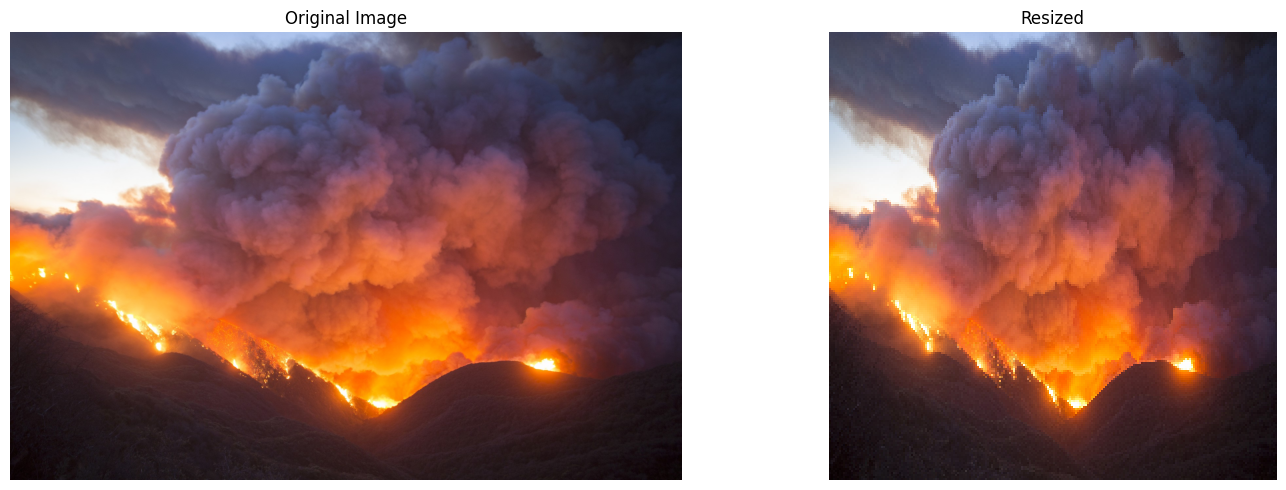

: 

In [ ]:
import cv2
import matplotlib.pyplot as plt
from albumentations import (
    Compose, Resize
)
import os

def load_image(image_path):
    """Load an image from a given path."""
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return image

def apply_augmentation(image, transform):
    """Apply a specific augmentation to an image."""
    augmented = transform(image=image)
    return augmented['image']

def plot_images(original_image, transformations, titles):
    """Plot images with transformations applied."""
    fig, axes = plt.subplots(1, len(transformations) + 1, figsize=(15, 5))

    # Original image
    axes[0].imshow(original_image)
    axes[0].set_title("Original Image")
    axes[0].axis("off")

    # Transformed images
    for i, (image, title) in enumerate(zip(transformations, titles)):
        axes[i + 1].imshow(image)
        axes[i + 1].set_title(title)
        axes[i + 1].axis("off")

    plt.tight_layout()
    plt.show()

# Specify the image path
image_path = r"C:\Users\Yash\Documents\Development\Projects\wildfire-dataset\train\fire\27866316047_a4b6968d59_o.jpg" # Replace with the path to your image

if not os.path.exists(image_path):
    print(f"Image path {image_path} does not exist. Please provide a valid path.")
else:
    original_image = load_image(image_path)

    # Define augmentations
    transformations = [
        Compose([Resize(224, 224)])  # Resize
    ]

    titles = [
        "Resized"
    ]

    # Apply augmentations
    augmented_images = [
        apply_augmentation(original_image, transform) for transform in transformations
    ]

    # Plot all images
    plot_images(original_image, augmented_images, titles)
